In [401]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

In [402]:
mark = pd.read_csv('./ml_ds_mark.csv', sep=',', encoding='utf-8')
mark

,Thang điểm (1-10),Số lượng,Môn
0,2.5-3.0,2,ML & DM
1,3.0-3.5,2,ML & DM
2,3.5-4.0,8,ML & DM
3,4.0-4.5,14,ML & DM
4,4.5-5.0,22,ML & DM
5,5.0-5.5,19,ML & DM
6,5.5-6.0,23,ML & DM
7,6.0-6.5,25,ML & DM
8,6.5-7.0,15,ML & DM
9,7.0-7.5,10,ML & DM


In [403]:
mark.iloc[:, -1].unique()

array(['ML & DM', 'Data Science'], dtype=object)

In [404]:
ml_df = mark[mark.iloc[:, -1] == 'ML & DM']
ds_df = mark[mark.iloc[:, -1] == 'Data Science']

In [405]:
def convert_scale_2_num(scale):
    a = float(scale.split("-")[0])
    b = float(scale.split("-")[1])
    return (a + b) / 2

In [406]:
mark_range_1 = ml_df.iloc[:, 0].apply(convert_scale_2_num).to_numpy()
mark_freq_1 = ml_df.iloc[:, 1].to_numpy()

In [407]:
mark_range_2 = ds_df.iloc[:, 0].apply(convert_scale_2_num).to_numpy()
mark_freq_2 = ds_df.iloc[:, 1].to_numpy()

In [408]:
def mark_list(mark_range, mark_freq):
    res = []
    for i in range(len(mark_range)):
        res = res + [mark_range[i]] * mark_freq[i]

    return np.array(res) 

In [409]:
mark_1 = mark_list(mark_range_1, mark_freq_1)
mark_2 = mark_list(mark_range_2, mark_freq_2)
mark_all = np.concatenate((mark_1, mark_2))

In [410]:
def density_list(x):
    mu = x.mean()
    sigma = x.std()
    return mu, sigma

In [411]:
x_1 = np.array([1.8, 1.7, 1.65, 1.63, 1.75, 1.71, 1.68, 1.72, 1.77, 1.62])
x_2 = np.array([1.75, 1.8, 1.85, 1.65, 1.91, 1.78, 1.88, 1.82, 1.79, 1.82, 1.81])
x_all = np.concatenate((x_1, x_2))

In [412]:
mu_1, sigma_1 = density_list(x_1)
mu_2, sigma_2 = density_list(x_2)
mu_all, sigma_all = density_list(x_all)

In [413]:
x = np.linspace(1.5, 2, 20000)

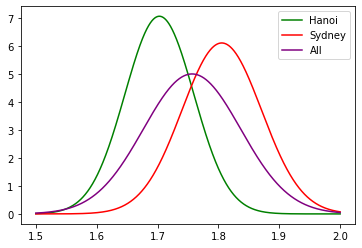

In [414]:
plt.plot(x, norm.pdf(x, mu_1, sigma_1), color='green')
plt.plot(x, norm.pdf(x, mu_2, sigma_2), color='red')
plt.plot(x, norm.pdf(x, mu_all, sigma_all), color='purple')
plt.legend(['Hanoi', 'Sydney', 'All'], loc='best')
plt.show()

In [415]:

mark_mu_1, mark_sigma_1 = density_list(mark_1)
mark_mu_2, mark_sigma_2 = density_list(mark_2)
mark_mu_all, mark_sigma_all = density_list(mark_all)

In [416]:
print(mark_mu_1, mark_sigma_1)
print(mark_mu_2, mark_sigma_2)
print(mark_mu_all, mark_sigma_all)

5.781645569620253 1.2946867373217459
7.074712643678161 1.2649195504657529
6.4593373493975905 1.4329397853238839


In [417]:
mark = np.linspace(2, 10, 100000)

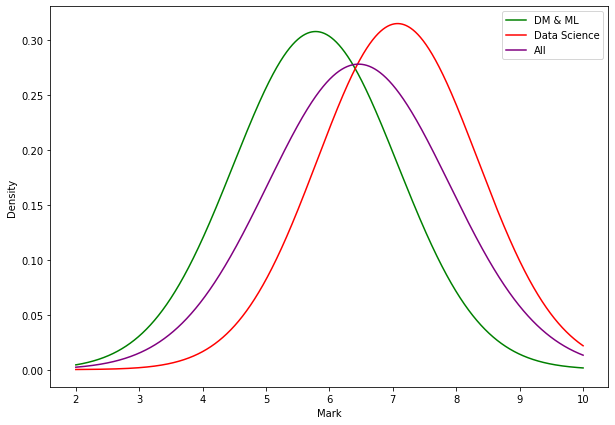

In [418]:
plt.figure(figsize=(10, 7))
plt.xlabel("Mark")
plt.ylabel("Density")
plt.plot(mark, norm.pdf(mark, mark_mu_1, mark_sigma_1), color='green')
plt.plot(mark, norm.pdf(mark, mark_mu_2, mark_sigma_2), color='red')
plt.plot(mark, norm.pdf(mark, mark_mu_all, mark_sigma_all), color='purple')
plt.legend(['DM & ML', 'Data Science', 'All'], loc='best')
plt.show()

In [419]:
n1 = ml_df.shape[0]
n2 = ds_df.shape[0]

p1 = n1/ (n1 + n2)
p2 = 1 - p1

In [420]:
print("p1=", p1)
print("p2=", p2)

p1= 0.52
p2= 0.48


In [421]:
norm.pdf(mark, mark_mu_all, mark_sigma_all)

array([0.00219626, 0.00219664, 0.00219702, ..., 0.01315328, 0.01315146,
       0.01314965])

In [422]:
p1 * norm.pdf(mark, mark_mu_1, mark_sigma_1) + p2 * norm.pdf(mark, mark_mu_2, mark_sigma_2)

array([0.00229814, 0.00229856, 0.00229898, ..., 0.01123761, 0.01123592,
       0.01123423])

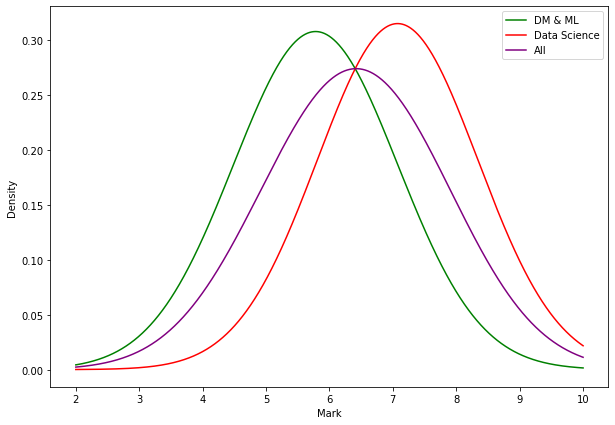

In [425]:
plt.figure(figsize=(10, 7))
plt.xlabel("Mark")
plt.ylabel("Density")
plt.plot(mark, norm.pdf(mark, mark_mu_1, mark_sigma_1), color='green')
plt.plot(mark, norm.pdf(mark, mark_mu_2, mark_sigma_2), color='red')
plt.plot(mark, p1 * norm.pdf(mark, mark_mu_1, mark_sigma_1) + p2 * norm.pdf(mark, mark_mu_2, mark_sigma_2) , color='purple')
plt.legend(['DM & ML', 'Data Science', 'All'], loc='best')
plt.show()